In [64]:
#Importamos datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [66]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
df.shape

(1599, 12)

In [93]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

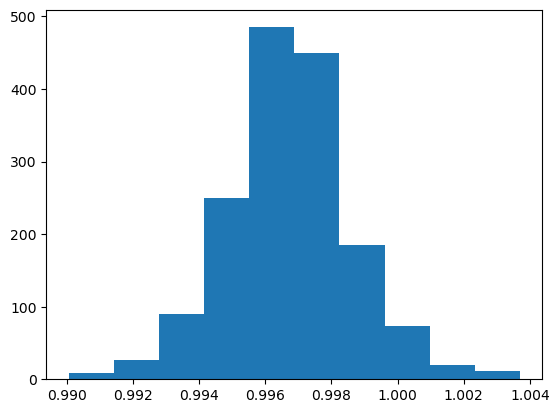

In [96]:
plt.hist(df.density)

<Axes: xlabel='citric acid', ylabel='alcohol'>

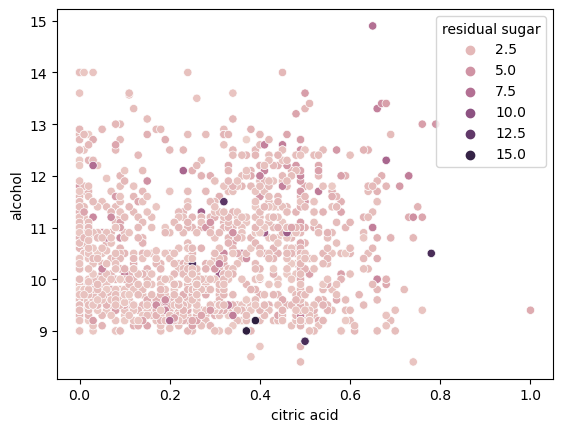

In [97]:
sns.scatterplot(x = "citric acid", y = "alcohol", hue = "residual sugar", data = df)

In [98]:
predictors_col = ["volatile acidity", "residual sugar","chlorides","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ['quality']

In [99]:
predictors = df[predictors_col]
target = df[target_col]

In [100]:
predictors

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [103]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [104]:
correl = predictors.corr()
correl

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
volatile acidity,1.000000,0.001918,0.061298,0.076470,0.022026,0.234937,-0.260987,-0.202288
residual sugar,0.001918,1.000000,0.055610,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.061298,0.055610,1.000000,0.047400,0.200632,-0.265026,0.371260,-0.221141
total sulfur dioxide,0.076470,0.203028,0.047400,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.022026,0.355283,0.200632,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,0.234937,-0.085652,-0.265026,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,-0.260987,0.005527,0.371260,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.202288,0.042075,-0.221141,-0.205654,-0.496180,0.205633,0.093595,1.000000


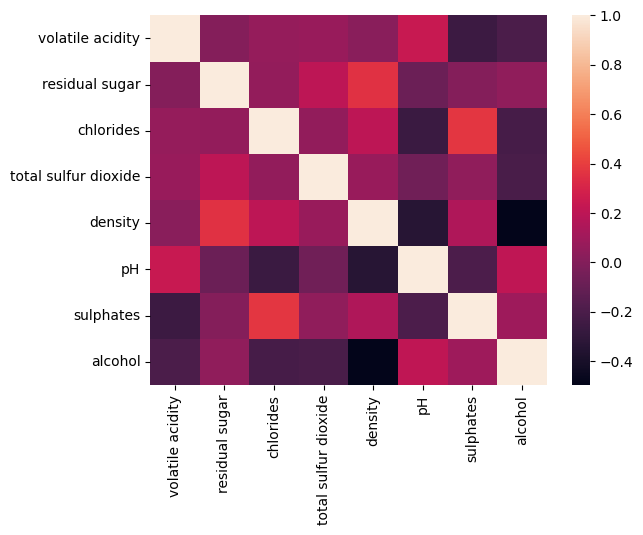

In [105]:
sns.heatmap(correl)
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=5)

In [118]:
tree = DecisionTreeClassifier()

In [131]:
arbol_desc = tree.fit(X_train, y_train)

[Text(0.44055884874645224, 0.975, 'X[7] <= 10.35\ngini = 0.645\nsamples = 1279\nvalue = [9, 47, 529, 523, 159, 12]'),
 Text(0.22773770104068117, 0.925, 'X[6] <= 0.585\ngini = 0.543\nsamples = 684\nvalue = [6, 27, 402, 226, 22, 1]'),
 Text(0.07236281929990539, 0.875, 'X[5] <= 3.545\ngini = 0.446\nsamples = 320\nvalue = [4, 18, 227, 70, 1, 0]'),
 Text(0.06933538315988647, 0.825, 'X[7] <= 9.075\ngini = 0.439\nsamples = 317\nvalue = [4, 18, 227, 67, 1, 0]'),
 Text(0.016461684011352885, 0.775, 'X[2] <= 0.071\ngini = 0.684\nsamples = 15\nvalue = [1, 3, 5, 6, 0, 0]'),
 Text(0.013434247871333965, 0.725, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.019489120151371806, 0.725, 'X[6] <= 0.515\ngini = 0.678\nsamples = 11\nvalue = [1, 3, 5, 2, 0, 0]'),
 Text(0.013434247871333965, 0.675, 'X[5] <= 3.335\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 0, 1, 0, 0]'),
 Text(0.010406811731315043, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.016461684011352885, 0.625

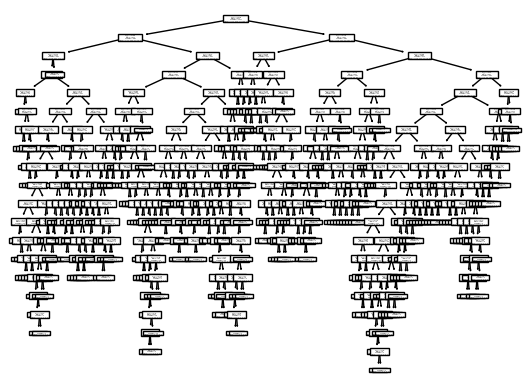

In [138]:
plot_tree(arbol_desc)

In [139]:
predicciones = arbol_desc.predict(X_test)

In [140]:
predicciones

array([6, 5, 5, 8, 5, 5, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5,
       7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 5, 7,
       6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 5, 5, 5, 5, 6, 4, 5, 5, 5, 6, 6, 5,
       6, 5, 8, 6, 6, 5, 6, 7, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 5, 7, 5, 5,
       7, 7, 5, 5, 5, 6, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 6, 4, 5, 6, 5, 6,
       5, 5, 6, 7, 5, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 7, 7, 7, 6, 5, 7, 5,
       7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 8, 6, 6,
       5, 6, 6, 6, 7, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 8, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 6, 6, 5, 6, 6,
       7, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 7, 5, 6, 6, 5, 7, 6, 5, 6, 7,
       6, 5, 6, 5, 5, 6, 6, 5, 4, 6, 6, 6, 5, 5, 6,

In [141]:
# Creamos y examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,1,0,0,0
4,1,2,2,1,0
5,2,108,38,4,0
6,0,21,76,15,3
7,0,1,18,21,0
8,0,1,2,2,1


In [142]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.646875